# Tensorflow neural network classification :


- Input layer shape : number of features
- Hidden layers (Depend on the problem [1,inf])
- Neurons per hidden layer (Depend on the problem 10~100 ?)
- Output layer shape : number of classes (or 1 for binary)
- Hidden activation (ReLU usually)
- Output activation : softmax (or sigmoid for binary)
- Loss function : cross-entropy (or binaryCrossEntropy)
- Optimizer (SGD, Adam,...)

In [ ]:
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Useful function for later:

def plot_decision_boundary(model,X,y) :
  x_min,x_max=X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min,y_max=X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

  x_in=np.c_[xx.ravel(),yy.ravel()] # stack the 2D arrays together

  y_pred=model.predict(x_in)

  if len(y_pred[0])>1 :
    print('multiclass classification')
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else :
    print('binary classification')
    y_pred=np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],s=40, c=y, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

## Create dataset :

In [ ]:
from sklearn.datasets import make_circles

n_samples=  1000

X,y=make_circles(n_samples,noise=0.03, random_state=42)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
circles=pd.DataFrame({'X0':X[:,0], 'X1':X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


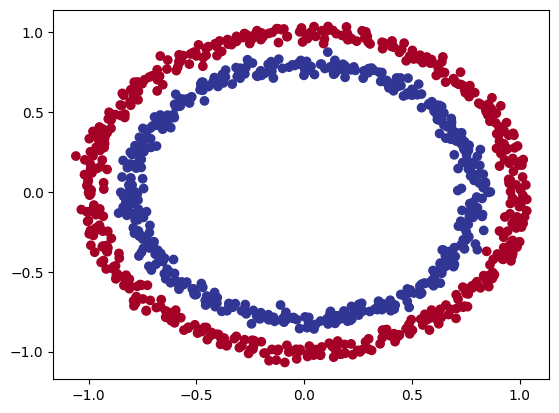

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

## Input & Output shapes :

In [ ]:
X.shape, y.shape, len(X), len(y)

((1000, 2), (1000,), 1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Modelling :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs=5) # Bad results

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4385 - loss: 5.2595   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5482 - loss: 5.6005 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5628 - loss: 4.9962 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5291 - loss: 5.1795 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5307 - loss: 4.8776  


In [ ]:
model_1.fit(X,y, epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y) # Still very bad, model's just guessing

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5045 - loss: 7.8989  


[7.971191883087158, 0.5]

## Improving the model :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 0.6915


[0.6954522728919983, 0.492000013589859]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


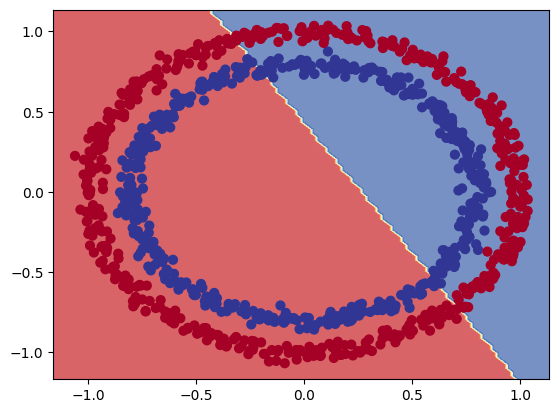

In [ ]:
# Check prediction boundary :
plot_decision_boundary(model=model_3,X=X,y=y)

## Adding non-linearity :

### Linear activation :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100,verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


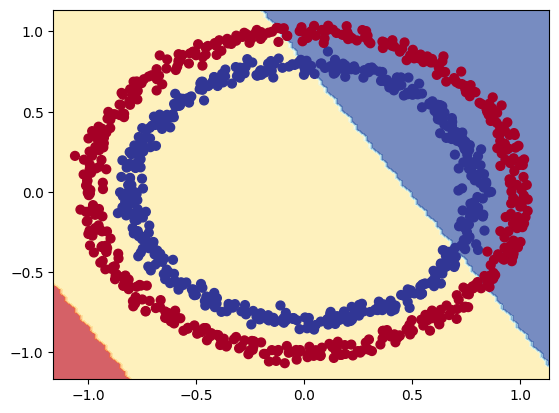

In [ ]:
plot_decision_boundary(model_4,X,y)

### Non-linear :

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100,verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


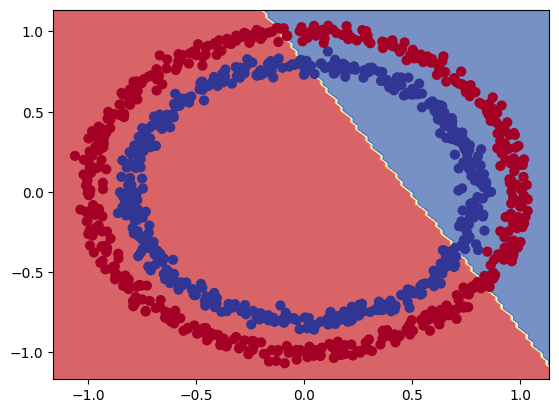

In [ ]:
plot_decision_boundary(model_5,X,y)

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu") ,
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_6.fit(X,y,epochs=100,verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification


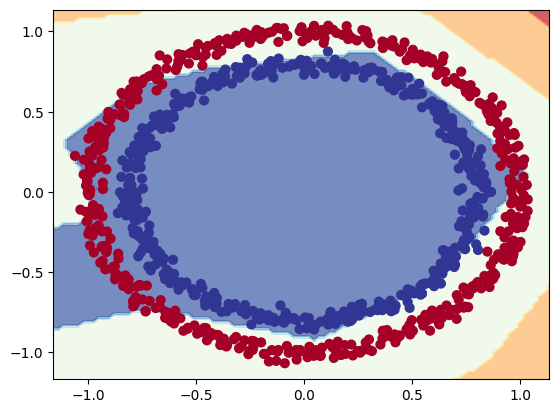

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu") ,
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_7.fit(X,y,epochs=200,verbose=0)

In [ ]:
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9936 - loss: 0.0688  


[0.06981930881738663, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
binary classification


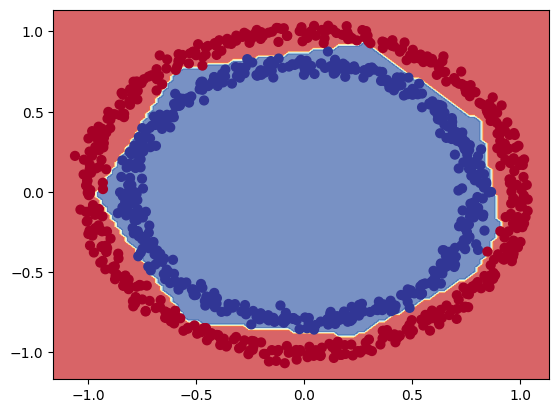

In [ ]:
plot_decision_boundary(model_7,X,y)

## Evaluating and improving our classification

In [ ]:
# Split train / test
X_train, y_train = X[:int(len(X)*0.8)], y[:int(len(X)*0.8)]
X_test, y_test = X[int(len(X)*0.8):], y[int(len(X)*0.8):]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Recreate model to fit on training data and evaluate on test
tf.random.set_seed(42)
random.seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu") ,
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(X_train,y_train,epochs=25,verbose=0)

In [ ]:
# Evaluate on test dataset
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0393  


[0.03731658682227135, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


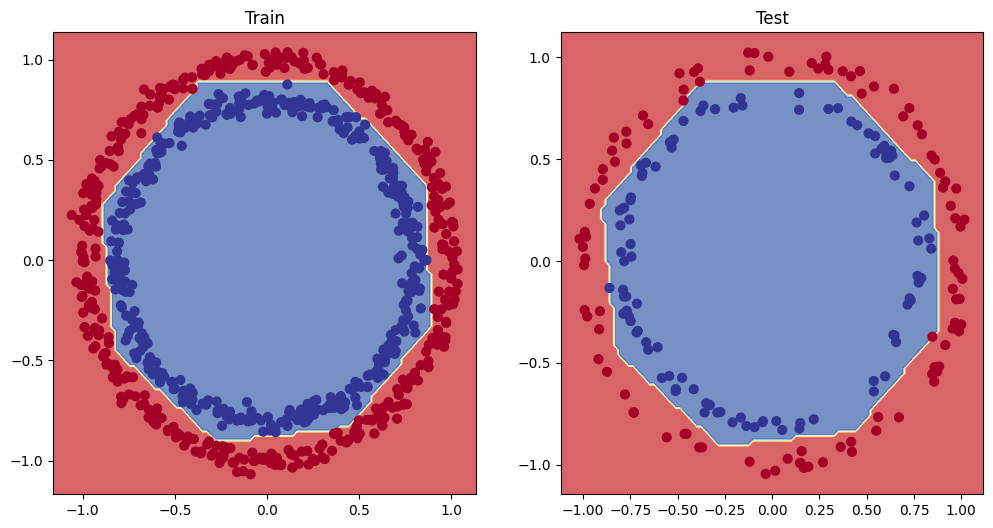

In [ ]:
# Plot decision boundary :
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

## Plot the loss / training curves :

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.50000,0.700090
1,0.48875,0.693118
2,0.50500,0.689508
3,0.52500,0.685880
4,0.53375,0.681135
5,0.58500,0.672577
6,0.62625,0.657975
7,0.66875,0.638978
8,0.71125,0.612724
9,0.76375,0.573659


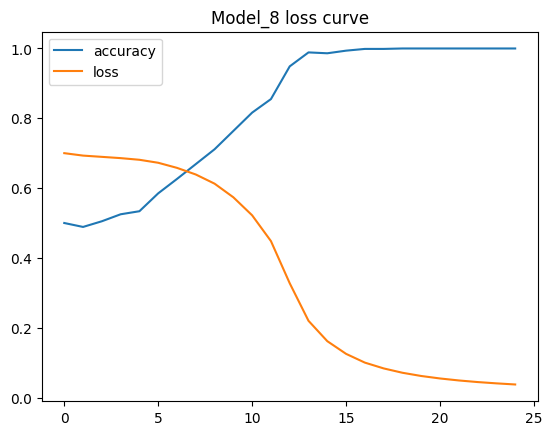

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve');

## Finding the best learning rate :

* Callback

In [ ]:
tf.random.set_seed(42)
random.seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu") ,
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

# Create a lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(X_train,y_train,epochs=100,verbose=0,callbacks=[lr_scheduler])

<Axes: xlabel='epochs'>

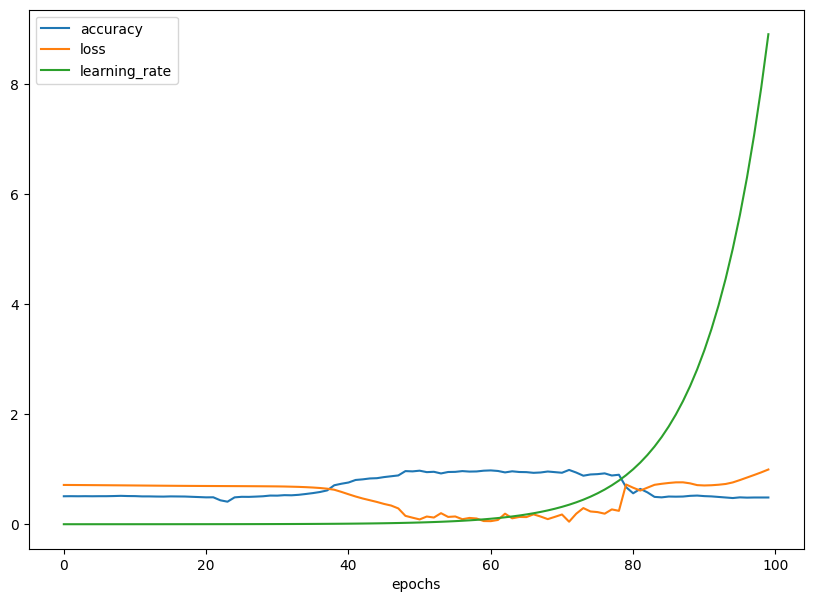

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

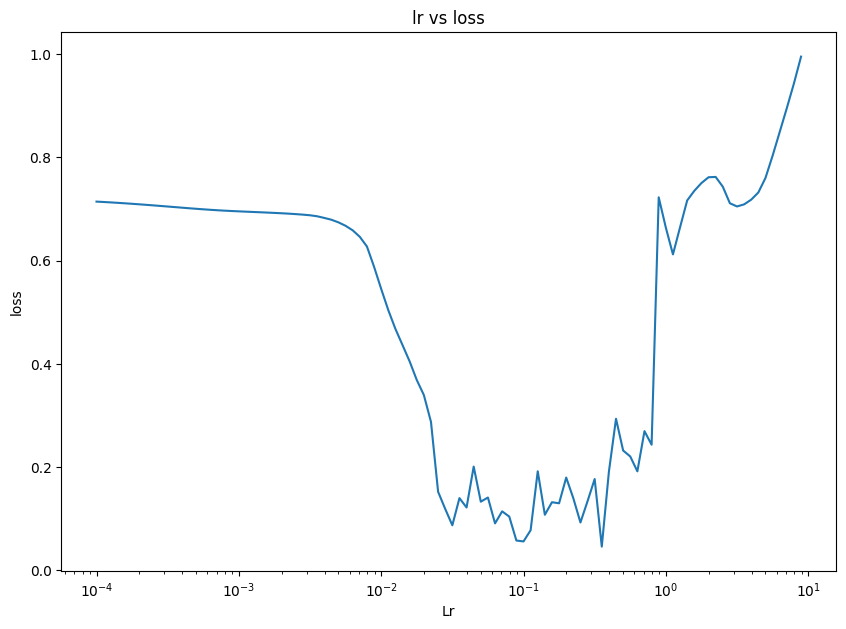

In [ ]:
# Plot lr vs loss :
lrs=1e-4*(10**(tf.range(100)/20)) # Same thing as in lr scheduler
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel('Lr')
plt.ylabel('loss')
plt.title('lr vs loss');
# best lr is somewhere btw lowest and 10* smaller (rule of thumb ) and the point where loss still decrease

In [ ]:
# Let's try using a ideal lr with same model :

tf.random.set_seed(42)
random.seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu") ,
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

history_10 = model_10.fit(X_train,y_train,epochs=20,verbose=0)

In [ ]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0265  


[0.030241183936595917, 0.9900000095367432]

In [ ]:
model_8.evaluate(X_test,y_test) # Higher loss & Higher accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0393 


[0.03731658682227135, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
binary classification


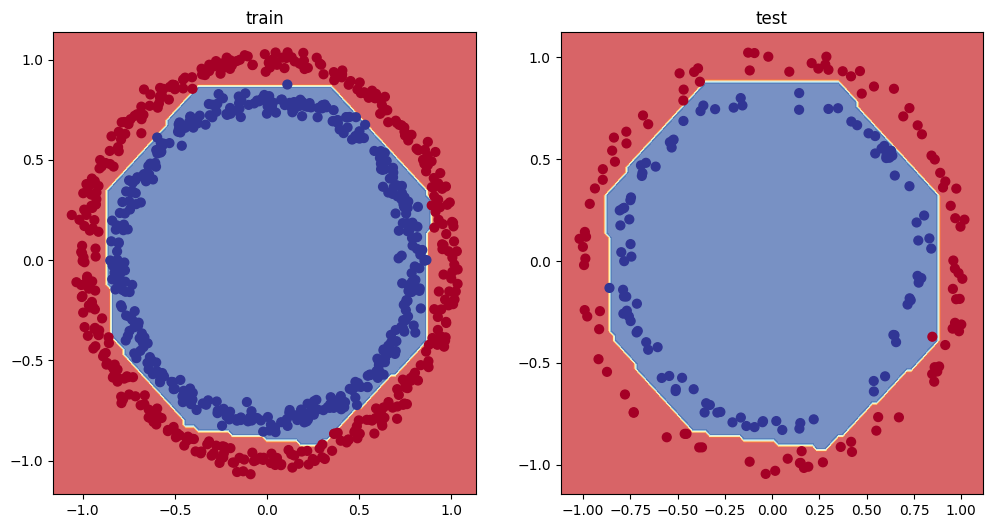

In [ ]:
# Plot decision boundary for train test
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

## Other evaluation methods for classification :

In [ ]:
# Check accuracy of our model :
loss, accuracy = model_10.evaluate(X_test,y_test);
print(f'Model loss on test set :{loss}')
print(f'Model acc on test set :{(accuracy*100):.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0265 
Model loss on test set :0.030241183936595917
Model acc on test set :99.00%


In [ ]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix

y_preds=model_10.predict(X_test)

confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[100,   1],
       [  1,  98]])

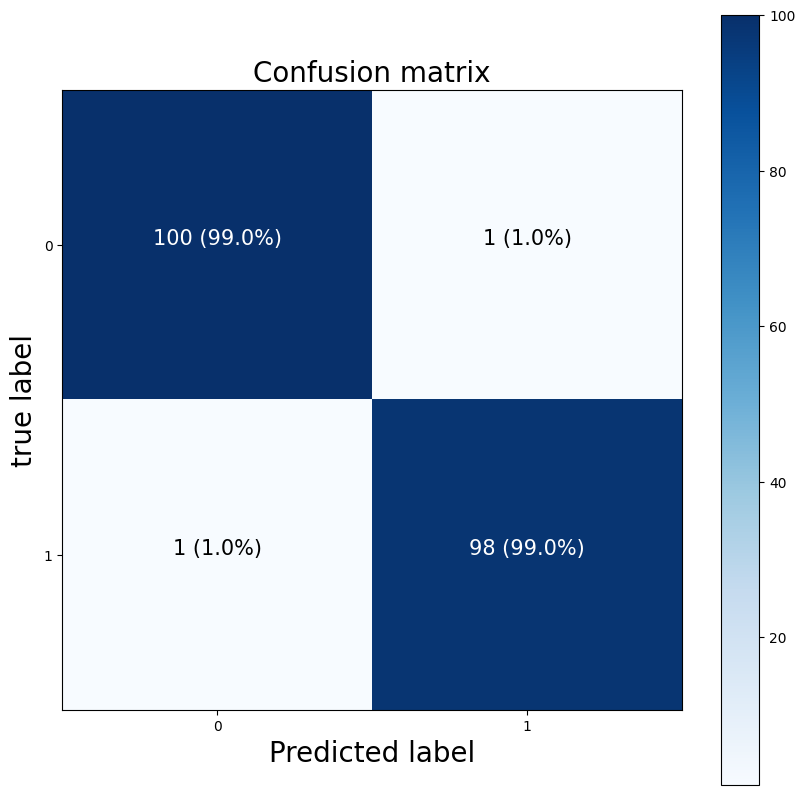

In [ ]:
# Prettier confusion matrix :

import itertools
figsize=(10,10)

cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# prettify it :
fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes :
  labels = classes
else :
  labels = np.arange(cm.shape[0])

# Label the axis :
ax.set(title='Confusion matrix',
       xlabel = 'Predicted label',
       ylabel='true label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       yticklabels=labels,
       xticklabels=labels)

#set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) /2.

for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j]>threshold else "black",
           size=15)

# Mutliclass classification : Fashion MNIST

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data is already split in train / test in keras.datasets
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [54]:
# Show first training ex :
print(f'training sample :\n{train_data[0]}\n')
print(f'training sample :\n{train_labels[0]}\n')

training sample :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [55]:
# Data shape :
train_data[0].shape, train_labels[0].shape

((28, 28), ())

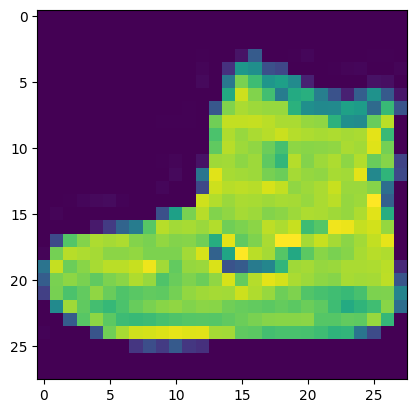

In [56]:
# Plot a single ex :
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [57]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

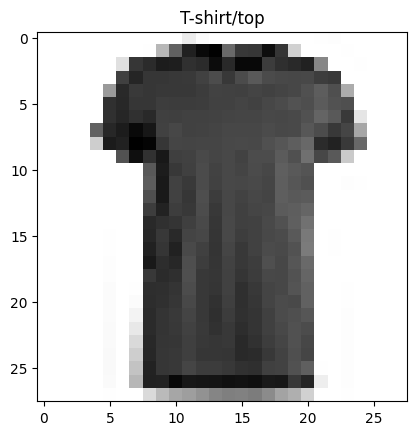

In [58]:
index_choice = 17
plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_choice]]);

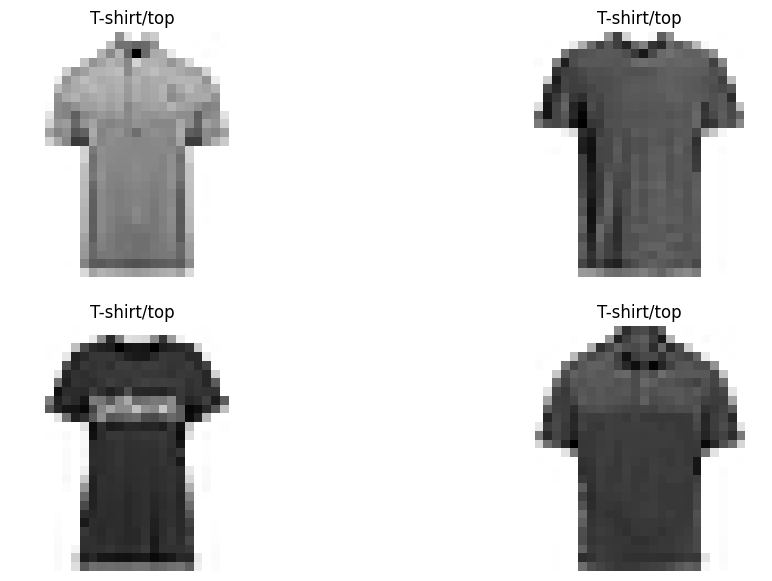

In [59]:
# Plot multiple random images :
import random
plt.figure(figsize=(12,7))
for i in range(4) :
  ax=plt.subplot(2,2,i+1)
  rand_ind = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_ind], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_ind]])
  plt.axis(False)

## Built a multiclass classification model :

Differences with binary classification :
* Input shape : 28x28
* output : 10
* loss : CategoricalCrossEntropy (one hot encoded labels) or SparseCategoricalCrossEntropy (int)
* Output activation : softmax

In [60]:
tf.random.set_seed(42)
random.seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # When we give it int labels, Without sparse if labels are onehot encoded
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1268 - loss: 2.5282 - val_accuracy: 0.2937 - val_loss: 1.9122
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3201 - loss: 1.7388 - val_accuracy: 0.3878 - val_loss: 1.4775
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3665 - loss: 1.5071 - val_accuracy: 0.4011 - val_loss: 1.4487
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3917 - loss: 1.4422 - val_accuracy: 0.4310 - val_loss: 1.3595
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4287 - loss: 1.3796 - val_accuracy: 0.4440 - val_loss: 1.3222
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4352 - loss: 1.3230 - val_accuracy: 0.4505 - val_loss: 1.2956
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4459 - loss: 1.3052 - val_accuracy: 0.4536 - val_loss: 1.2831
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4495 - loss: 1.2939 

In [61]:
model_11.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [62]:
# Check min and max :
print(train_data.min(), train_data.max())

# Normalize :
train_data_norm=train_data/255.
test_data_norm=test_data/255.

# Check min and max :

print(train_data_norm.min(), train_data_norm.max())

0 255
0.0 1.0


In [63]:
# Create model on normalized data
tf.random.set_seed(42)
random.seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3785 - loss: 1.6569 - val_accuracy: 0.6112 - val_loss: 0.9645
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6300 - loss: 0.9173 - val_accuracy: 0.6559 - val_loss: 0.8440
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6680 - loss: 0.8211 - val_accuracy: 0.6867 - val_loss: 0.7963
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6962 - loss: 0.7775 - val_accuracy: 0.7053 - val_loss: 0.7658
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7223 - loss: 0.7452 - val_accuracy: 0.7350 - val_loss: 0.7321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7452 - loss: 0.7060 - val_accuracy: 0.7513 - val_loss: 0.6858
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7648 - loss: 0.6556 - val_accuracy: 0.7607 - val_loss: 0.6582
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7754 - loss: 0.6318 - 

<Axes: title={'center': 'Normalized data'}>

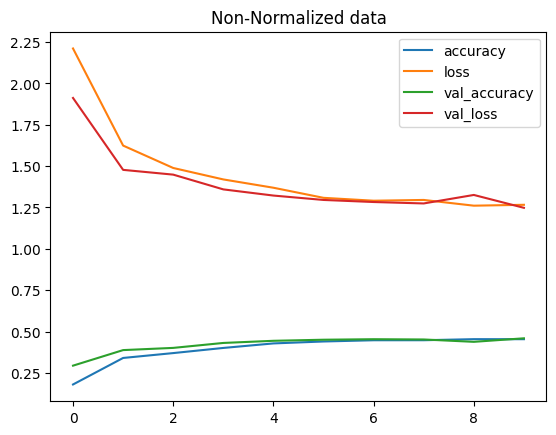

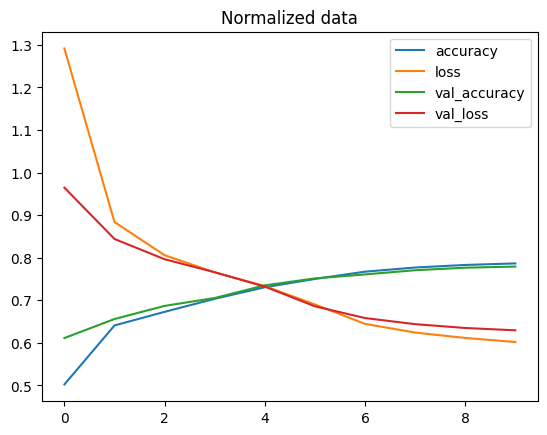

In [64]:
import pandas as pd
# plot non-norm data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

## Find the ideal learning rate :

In [65]:
tf.random.set_seed(42)
random.seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # When we give it int labels, Without sparse if labels are onehot encoded
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callbacks :
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch/20))

find_lr_history = model_13.fit(train_data_norm,train_labels,epochs=40,
                                validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3785 - loss: 1.6569 - val_accuracy: 0.6112 - val_loss: 0.9645 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6315 - loss: 0.9150 - val_accuracy: 0.6562 - val_loss: 0.8376 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6705 - loss: 0.8150 - val_accuracy: 0.6915 - val_loss: 0.7865 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7067 - loss: 0.7668 - val_accuracy: 0.7252 - val_loss: 0.7390 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7443 - loss: 0.7064 - val_accuracy: 0.7587 - val_loss: 0.6679 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7687 - loss: 0.6463 - val_accuracy: 0.7732 - val_loss: 0.6469 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7787 - 

Text(0.5, 1.0, 'find best lr')

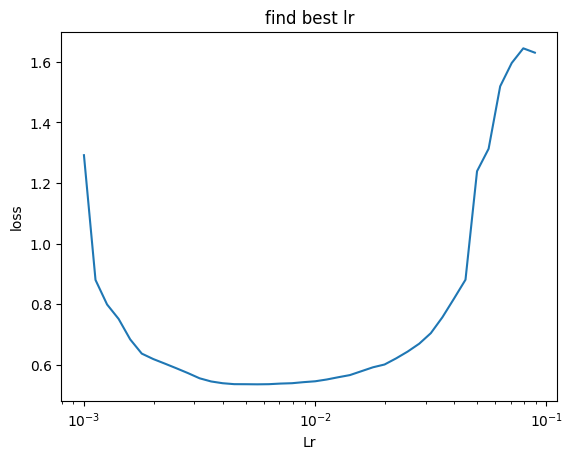

In [66]:
# Plot learning rate curve :
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('Lr')
plt.ylabel('loss')
plt.title('find best lr') #Here is around 1e-3, default for adam

In [67]:
# Refit a model with idea learning rate :
tf.random.set_seed(42)
random.seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,train_labels,epochs=20,
                                validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3785 - loss: 1.6569 - val_accuracy: 0.6112 - val_loss: 0.9645
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6300 - loss: 0.9173 - val_accuracy: 0.6559 - val_loss: 0.8440
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6680 - loss: 0.8211 - val_accuracy: 0.6867 - val_loss: 0.7963
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6962 - loss: 0.7775 - val_accuracy: 0.7053 - val_loss: 0.7658
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7223 - loss: 0.7452 - val_accuracy: 0.7350 - val_loss: 0.7321
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7452 - loss: 0.7060 - val_accuracy: 0.7513 - val_loss: 0.6858
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7648 - loss: 0.6556 - val_accuracy: 0.7607 - val_loss: 0.6582
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7754 - loss: 0.6318 - 

## Evaluating the model :
* Using metrics
* Asses predictions
* Improve results
* Save and export

In [68]:
# Confusion matrix :

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15) :
  """ Create a confusion matrix """

  cm=confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # prettify it :
  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes :
    labels = classes
  else :
    labels = np.arange(cm.shape[0])

  # Label the axis :
  ax.set(title='Confusion matrix',
        xlabel = 'Predicted label',
        ylabel='true label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        yticklabels=labels,
        xticklabels=labels)

  #set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) /2.

  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i,j]>threshold else "black",
            size=text_size)

In [69]:
# Make some predictions
y_probs = model_14.predict(test_data_norm)

# View the first five pred :
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.7396765e-10, 2.1248130e-10, 2.6633049e-09, 1.4358694e-06,
        3.1199593e-10, 1.3428876e-01, 6.6768485e-10, 2.0691228e-01,
        1.0685502e-03, 6.5772891e-01],
       [3.9661643e-03, 3.3279714e-05, 8.8429266e-01, 6.3728017e-04,
        6.0874064e-02, 5.2265648e-04, 3.8476329e-02, 6.6504162e-04,
        4.8825401e-05, 1.0483458e-02],
       [9.1565653e-06, 9.9843574e-01, 5.6188723e-13, 1.5550152e-03,
        1.5573075e-13, 5.1594597e-18, 1.5240236e-09, 6.9621161e-19,
        2.4378782e-13, 1.3965079e-16],
       [4.2148181e-07, 9.9800402e-01, 2.8917116e-15, 1.9955360e-03,
        6.6301292e-17, 6.4267858e-15, 7.3854672e-12, 6.2739828e-15,
        4.8339466e-12, 2.8840787e-14],
       [9.4940387e-02, 4.7460751e-04, 3.0560285e-01, 1.3004054e-02,
        1.1986173e-01, 1.2588369e-04, 4.6542117e-01, 1.0948152e-06,
        5.5302179e-04, 1.5099180e-05]], dtype=float32)

In [70]:
# Convert probs to preds :
y_preds= y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

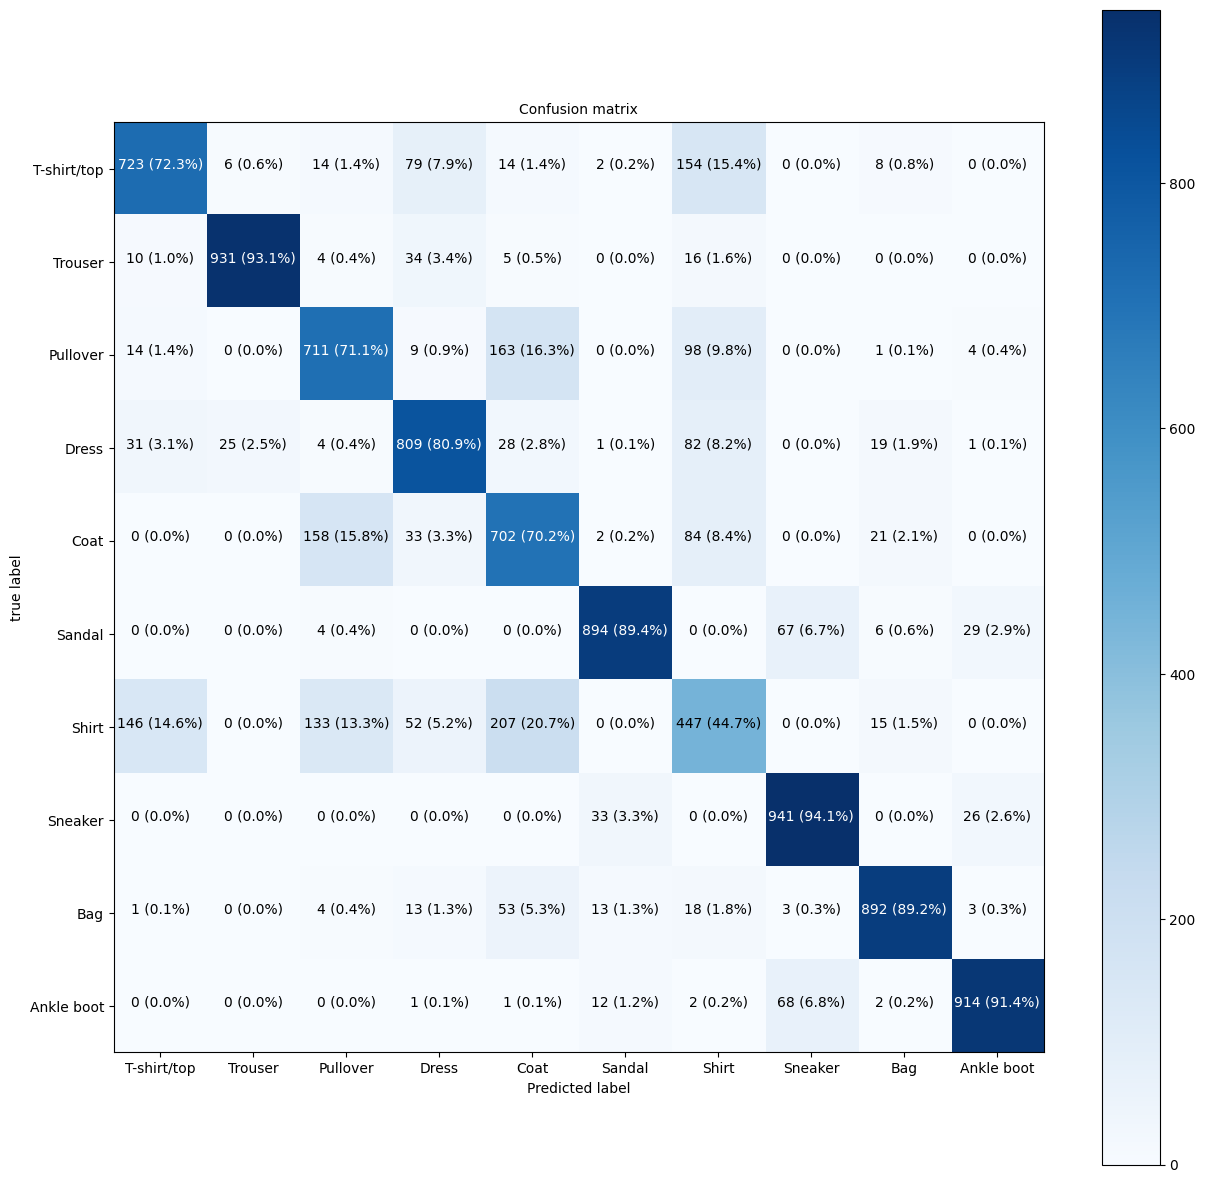

In [71]:
# Confusion matrix :
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [75]:
import random
def plot_random_image(model, images,true_labels,classes) :
  """ Picks a random img, Plot it with it's prediction and true label"""
  i = random.randint(0,len(images))
  target_img=images[i]
  pred_probs=model.predict(target_img.reshape(1,28,28))
  pred_label= classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(target_img,cmap=plt.cm.binary)

  if pred_label == true_label :
    color='green'
  else : color='red'

  plt.xlabel("Pred: {} {:2.0f}% (True :{})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


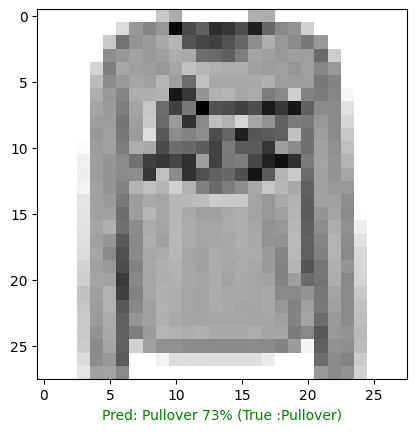

In [84]:
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## Patterns / Weights learned by our model :

In [85]:
model_14.layers

[<Flatten name=flatten_10, built=True>,
 <Dense name=dense_30, built=True>,
 <Dense name=dense_31, built=True>,
 <Dense name=dense_32, built=True>]

In [86]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# weights shapes :
weights, weights.shape

(array([[ 0.53921574,  0.05349996,  0.44045424, -0.49600318],
        [ 0.3403216 ,  0.01661788,  0.20147343, -0.5481082 ],
        [ 0.49667922, -0.63206774,  0.7885541 , -1.06404   ],
        ...,
        [ 0.558842  ,  0.0927887 , -0.17900354, -0.4051586 ],
        [-0.18254527,  0.03449072, -0.27373692,  0.2363887 ],
        [-0.6450159 , -0.19445392,  0.7906924 , -0.31947145]],
       dtype=float32),
 (784, 4))

In [87]:
# Biases and shapes :
biases, biases.shape # bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

(array([ 2.227826  ,  1.0812201 , -0.47180235, -0.7337579 ], dtype=float32),
 (4,))

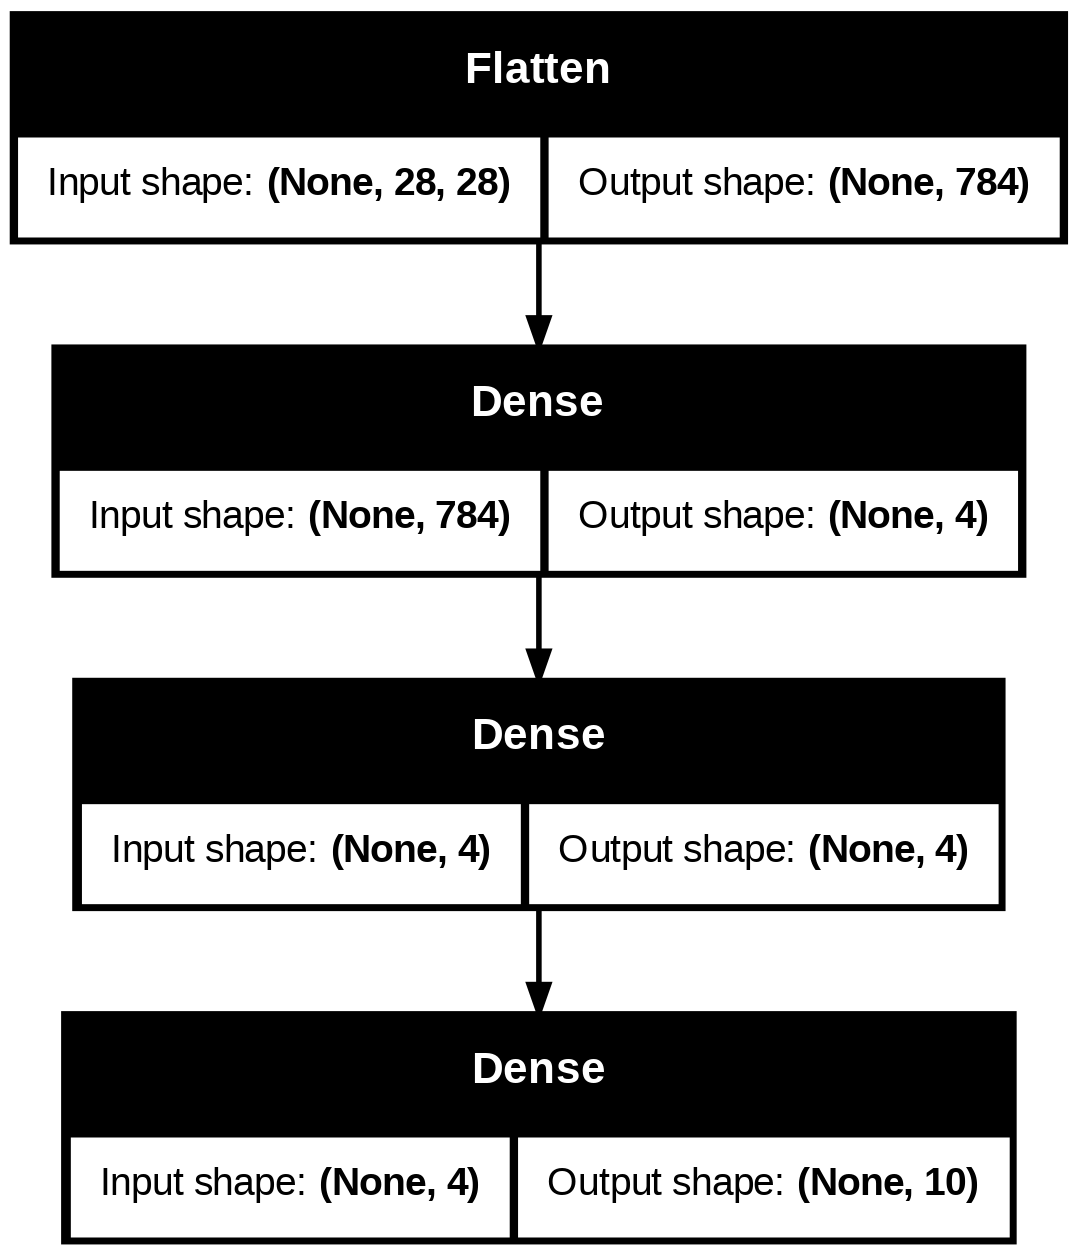

In [90]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)